In this project I'd like dig deeper in history of the Olympic Games and show some interesting facts using pandas and matplotlib. <br> 
This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. 

The columns are:

ID - Unique number for each athlete <br>
Name - Athlete's name <br>
Sex - M or F <br>
Age - Integer <br>
Height - In centimeters <br>
Weight - In kilograms <br>
Team - Team name <br>
NOC - National Olympic Committee 3-letter code <br>
Games - Year and season <br>
Year - Integer <br>
Season - Summer or Winter <br>
City - Host city <br>
Sport - Sport <br>
Event - Event <br>
Medal - Gold, Silver, Bronze, or NA <br>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

## Upload data

In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
country_code = pd.read_csv('noc_regions.csv')

Let's have a look at our data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
country_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
df = df.merge(country_code, on='NOC')

In [8]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


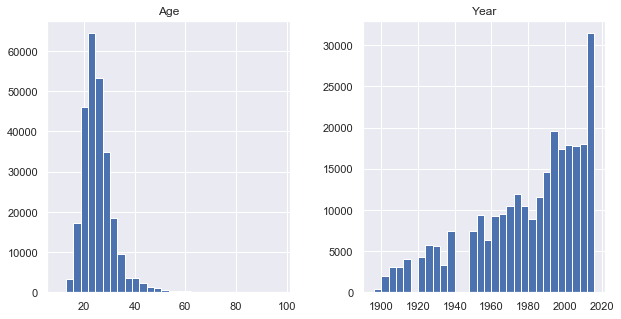

In [9]:
df[['Year', 'Age']].hist(bins=30, figsize=(10,5));

We can see age histogram is right skewed it means that most of participants was in range 20-30 years old, but we have a couple of older members. <br>
Count of members increase from year to year.

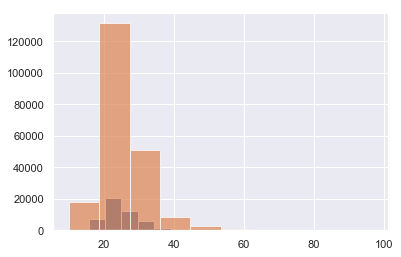

In [10]:
df[df['Season'] == 'Winter']['Age'].hist()
df[df['Season'] == 'Summer']['Age'].hist(alpha=0.7);

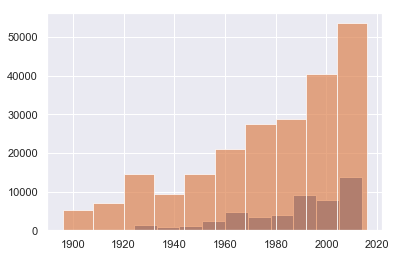

In [11]:
df[df['Season'] == 'Winter']['Year'].hist()
df[df['Season'] == 'Summer']['Year'].hist(alpha=0.7);

We can notice a big difference between amount of participants in Summer Games  and Winter Games. In Summer games attends more sportsmen than in Winter Games.
Also, in both season amont of participants increase from year to year.

## Age

Let's explore a few thing about participants' age. 
How was changing mean age of participants?
And how young or how old you can be to contibute in The Olympic Games?

In [12]:
#mean participants' age
mean_age = df.pivot_table('Age', index='Year', columns=['Season', 'Sex'], aggfunc='mean')
mean_age

Season     Summer                Winter           
Sex             F          M          F          M
Year                                              
1896          NaN  23.580645        NaN        NaN
1900    29.791667  29.017825        NaN        NaN
1904    50.230769  26.396450        NaN        NaN
1906    23.500000  27.139959        NaN        NaN
1908    33.897436  26.858268        NaN        NaN
1912    22.379310  27.656834        NaN        NaN
1920    24.409836  29.470075        NaN        NaN
1924    26.421053  28.546741  25.625000  27.671835
1928    23.510264  29.947856  26.178571  26.605603
1932    29.664557  33.961637  22.571429  25.750000
1936    23.253363  28.230454  22.802469  25.275218
1948    26.122558  29.689227  22.834586  26.721748
1952    22.906658  27.011177  22.670270  26.015504
1956    22.361176  26.877968  22.817073  26.198842
1960    21.871938  26.044808  22.000000  25.055351
1964    21.736647  25.776264  22.633663  24.950037
1968    20.514366  25.242844  22.091346  24.822802
1972    20.529277  25.386247  21.910843  24.844786
1976    20.702815  24.929227  21.246544  24.503531
1980    20.987305  24.597496  21.665116  24.307224
1984    21.891260  24.768608  22.268657  23.839950
1988    22.395138  24.873058  22.466176  24.318670
1992    22.928101  25.092791  23.092979  24.441831
1994          NaN        NaN  23.465158  24.937165
1996    23.660128  25.649582        NaN        NaN
1998          NaN        NaN  24.353324  25.668319
2000    24.488647  26.037828        NaN        NaN
2002          NaN        NaN  25.128951  26.409181
2004    24.782499  26.243093        NaN        NaN
2006          NaN        NaN  25.190666  26.473524
2008    24.889138  26.376946        NaN        NaN
2010          NaN        NaN  25.300487  26.719765
2012    25.168192  26.621740        NaN        NaN
2014          NaN        NaN  25.334652  26.447699
2016    25.573916  26.743325        NaN        NaN

The 1992 Winter Games were the last to be held in the same year as the Summer Games. So, start from 1992 we have empty values for Summer Games in year when was Winter Game and vice versa.
We can fill empty values by values from previous games (using method 'ffill') or we can separate data to Winter and Summer Games. 

In [13]:
mean_age.fillna(method='ffill', inplace=True) #fill empty values 

In [14]:
#separate by sex
female_age = mean_age.xs('F', level=1, axis=1)
male_age = mean_age.xs('M', level=1, axis=1)

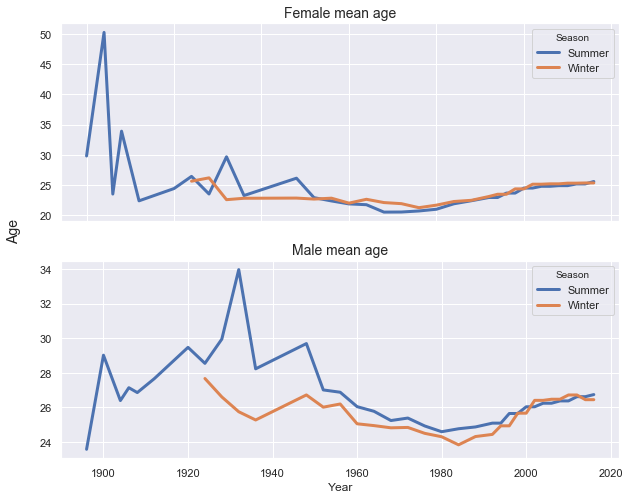

In [15]:
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

female_age.plot(ax=ax1, sharex=True, grid=True, linewidth=3)
ax1.set_title('Female mean age', size=14)

male_age.plot(ax=ax2, grid=True, linewidth=3)
ax2.set_title('Male mean age', size=14)
ax2.set_xlabel('Year', size=12)
fig.text(0.05, 0.52, 'Age', va='center', rotation='vertical', size=14);

In [16]:
#separate by season
winter_age = mean_age['Winter']
summer_age = mean_age['Summer']

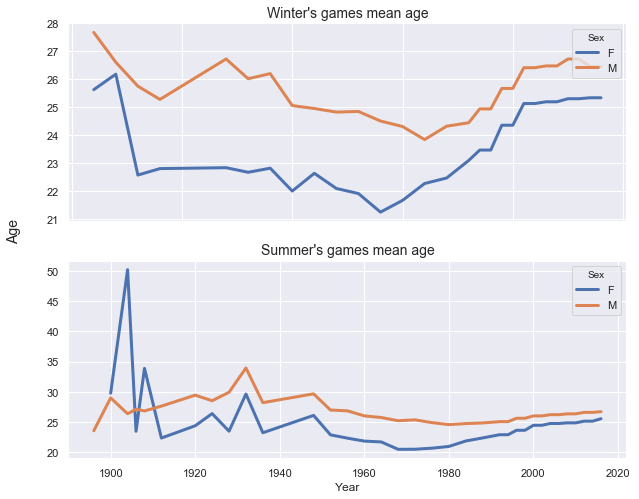

In [17]:
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

winter_age.plot(ax=ax1, sharex=True, grid=True, linewidth=3)
ax1.set_title("Winter's games mean age", size=14)
ax1.legend(title='Sex', loc='upper right');


summer_age.plot(ax=ax2, grid=True, linewidth=3)
ax2.set_title("Summer's games mean age", size=14)
ax2.set_xlabel('Year', size=12)
fig.text(0.04, 0.52, 'Age', va='center', rotation='vertical', size=14);

So, we can make conclusion, that generally male participants a little bit older than female. Also, we can notice
downtrend for winter games and after 1964 for male and 1984 for female it's changed to uptrend.<br>

Now let's see on the youngest and the oldest members.

In [18]:
def min_max_age(group):
    "Add min and max age for each group"
    group['min_age'] = group['Age'].min()
    group['max_age'] = group['Age'].max()
    return group

In [19]:
age_range = df.groupby(['Year', 'Sex']).apply(min_max_age) #add min, max age

In [20]:
age_range = age_range.groupby(['Year', 'Sex'])['min_age', 'max_age'].mean().unstack()
age_range

min_age       max_age      
Sex        F     M       F     M
Year                            
1896     NaN  10.0     NaN  40.0
1900    13.0  15.0    46.0  71.0
1904    24.0  14.0    63.0  71.0
1906    21.0  13.0    26.0  54.0
1908    21.0  14.0    54.0  61.0
1912    13.0  15.0    45.0  67.0
1920    13.0  13.0    42.0  72.0
1924    11.0  14.0    74.0  81.0
1928    11.0  13.0    67.0  97.0
1932    11.0  13.0    69.0  96.0
1936    11.0  12.0    73.0  74.0
1948    12.0  13.0    72.0  84.0
1952    13.0  12.0    45.0  65.0
1956    12.0  13.0    61.0  67.0
1960    11.0  13.0    65.0  64.0
1964    12.0  13.0    43.0  60.0
1968    11.0  12.0    66.0  68.0
1972    13.0  12.0    69.0  66.0
1976    12.0  14.0    48.0  70.0
1980    13.0  13.0    49.0  70.0
1984    13.0  12.0    52.0  60.0
1988    11.0  12.0    63.0  70.0
1992    12.0  11.0    53.0  62.0
1994    13.0  15.0    40.0  46.0
1996    12.0  14.0    58.0  63.0
1998    15.0  14.0    44.0  50.0
2000    13.0  14.0    53.0  63.0
2002    15.0  15.0    48.0  48.0
2004    13.0  14.0    56.0  57.0
2006    14.0  15.0    44.0  52.0
2008    12.0  13.0    58.0  67.0
2010    15.0  15.0    46.0  51.0
2012    13.0  15.0    57.0  71.0
2014    15.0  15.0    45.0  55.0
2016    13.0  14.0    62.0  60.0

In [21]:
#separate age range by sex
range_male = age_range.xs('M', level=1, axis=1)
range_female = age_range.xs('F', level=1, axis=1)

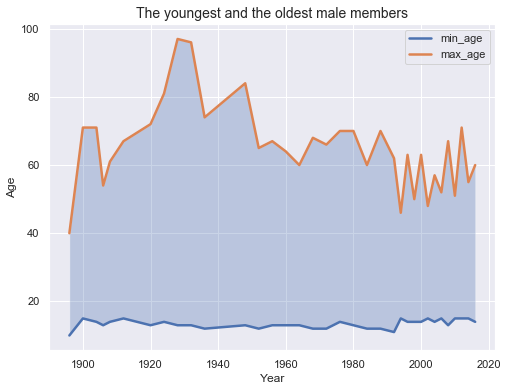

In [22]:
range_male.plot(figsize=(8, 6), linewidth=2.5)

plt.title('The youngest and the oldest male members', size=14)
plt.ylabel('Age', size=12)

plt.fill_between(range_male.index, range_male['min_age'], range_male['max_age'], alpha=0.3);

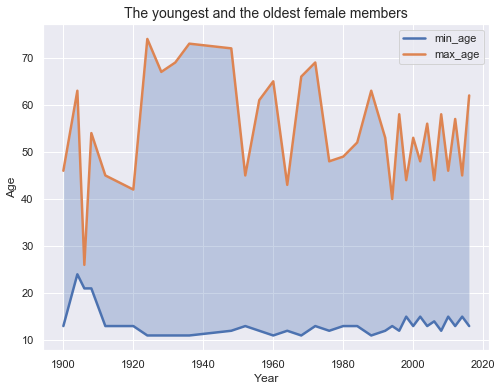

In [23]:
range_female.plot(figsize=(8, 6), linewidth=2.5)

plt.title('The youngest and the oldest female members', size=14)
plt.ylabel('Age', size=12)

plt.fill_between(range_female.index, range_female['min_age'], range_female['max_age'], alpha=0.3);

It seems like we have some couple of sportsmen older than 60 and even 80. And the youngest participants are at 12-14 years. <br>

I want to know in which sports they attended.

In [24]:
df[df['Age'] > 60]['Sport'].value_counts()

Art Competitions    463
Shooting             35
Equestrianism        31
Archery              19
Sailing              18
Fencing               3
Roque                 1
Name: Sport, dtype: int64

In [25]:
df[df['Age'] < 14]['Sport'].value_counts()

Swimming                     129
Gymnastics                    41
Figure Skating                26
Rowing                        17
Diving                        10
Athletics                      4
Speed Skating                  2
Sailing                        1
Rhythmic Gymnastics            1
Freestyle Skiing               1
Short Track Speed Skating      1
Tennis                         1
Name: Sport, dtype: int64

So, the most popular sport for people after 60 it's 'Art Competitions'. I never heard what is 'Art Competitions', but after little research I found that: <br> 

_"Art competitions formed part of the modern Olympic Games during its early years, from 1912 to 1948. Medals were awarded for works of art inspired by sport, divided into five categories: architecture, literature, music, painting, and sculpture."_ <br>

Also, they attend in shooting, archery and equestrianism.

And younger olympians attends in swimming, gymnastics and figure skating.

## Medals

Ok, we got some information about participants, but how about medals? Which country has a better sportsmen? Who got the most medals and in which sport? 


In [26]:
df['Medal'].value_counts()

Gold      13371
Bronze    13291
Silver    13112
Name: Medal, dtype: int64

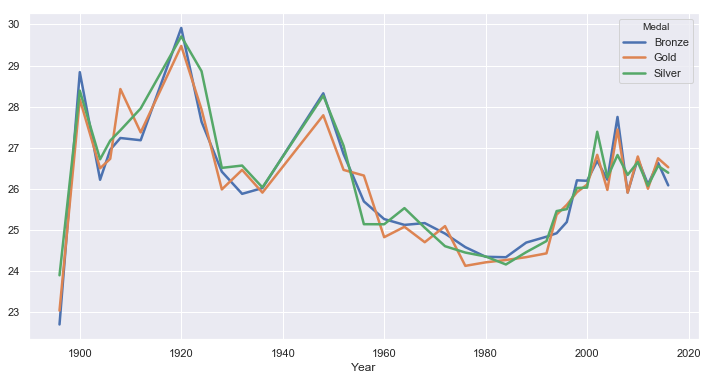

In [27]:
df.groupby(['Year', 'Medal'])['Age'].mean().unstack().plot(figsize=(12, 6), linewidth=2.5);

Which countries got the most medals.

In [28]:
medals_count = df.groupby(['region', 'Medal'])['Medal'].count().unstack()

In [29]:
indexer = medals_count.sum(1).argsort() #ranking by sum of medals

In [30]:
top10_medals = medals_count.take(indexer[-10:])[::-1]
top10_medals

Medal,Bronze,Gold,Silver
region,,,
USA,1358.0,2638.0,1641.0
Russia,1178.0,1599.0,1170.0
Germany,1260.0,1301.0,1195.0
UK,651.0,678.0,739.0
France,666.0,501.0,610.0
Italy,531.0,575.0,531.0
Sweden,535.0,479.0,522.0
Canada,451.0,463.0,438.0
Australia,522.0,368.0,459.0


In [31]:
top10_medals = top10_medals.stack()
top10_medals.name = 'Total'
top10_medals = top10_medals.reset_index()

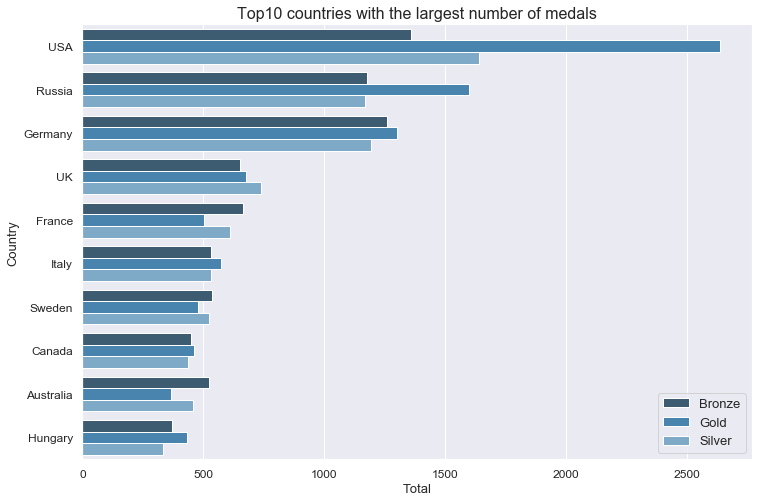

In [32]:
plt.figure(figsize=(12, 8))
plt.title('Top10 countries with the largest number of medals', size=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.barplot(x='Total', y='region', hue='Medal', data=top10_medals,
           color='b', palette='Blues_d')

plt.xlabel('Total', fontsize=13)
plt.ylabel('Country', fontsize=13)

plt.legend(fontsize=13);

United States won more medals than other countries. Let's see in which sports they feel the most confident. 

In [33]:
usa_gold_medals = df[(df['region'] == 'USA') & (df['Medal'] == 'Gold')]

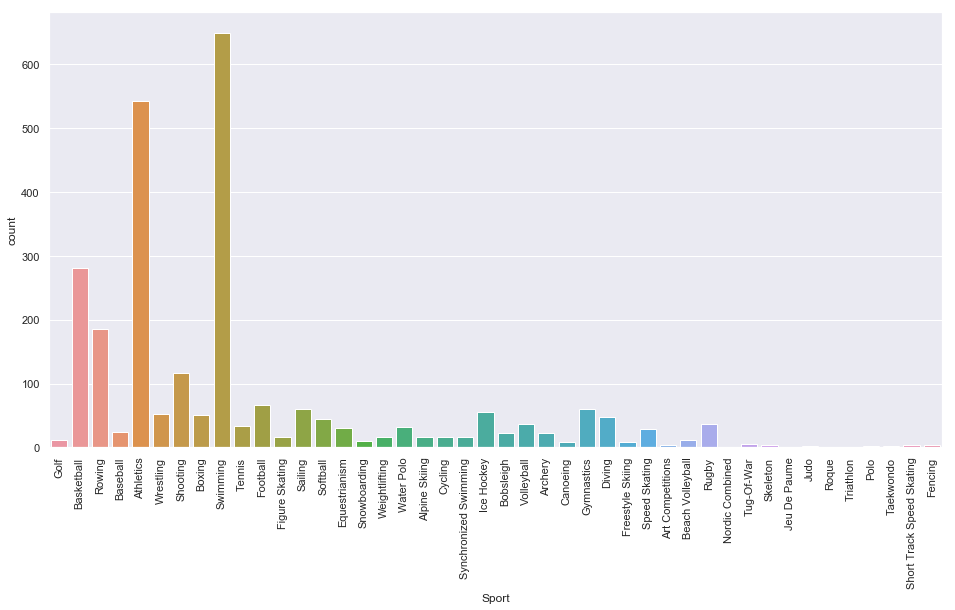

In [34]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
sns.countplot(x='Sport', data=usa_gold_medals);

So, United States pretty well in swimmings, athletics and basketball. <br>

Now, let's explore which sportsmen got the most medals in Olympic history.

In [35]:
#use ID for avoid duplicates in names
top_medalists = df.groupby(['ID', 'Name', 'Sport', 'Medal'])['Medal'].count().unstack() 

In [36]:
indexer = top_medalists.sum(1).argsort() #ranking by sum of medals

In [37]:
top15_medalist = top_medalists.take(indexer[-15:])[::-1]

In [38]:
top15_medalist['Total'] = top15_medalist.sum(1)

In [39]:
top15_medalist.reset_index(inplace=True)
top15_medalist = top15_medalist.reindex(columns=['Name', 'Sport', 'Gold', 'Silver', 'Bronze', 'Total']) #set in convenient order
top15_medalist.set_index(['Name'], inplace=True)
top15_medalist.rename_axis(None, axis=1, inplace=True) #remove axis1 name 'Medal'

In [40]:
top15_medalist

,Sport,Gold,Silver,Bronze,Total
Name,,,,,
"Michael Fred Phelps, II",Swimming,23.0,3.0,2.0,28.0
Larysa Semenivna Latynina (Diriy-),Gymnastics,9.0,5.0,4.0,18.0
Nikolay Yefimovich Andrianov,Gymnastics,7.0,5.0,3.0,15.0
Ole Einar Bjrndalen,Biathlon,8.0,4.0,1.0,13.0
Edoardo Mangiarotti,Fencing,6.0,5.0,2.0,13.0
Borys Anfiyanovych Shakhlin,Gymnastics,7.0,4.0,2.0,13.0
Takashi Ono,Gymnastics,5.0,4.0,4.0,13.0
Sawao Kato,Gymnastics,8.0,3.0,1.0,12.0
"Dara Grace Torres (-Hoffman, -Minas)",Swimming,4.0,4.0,4.0,12.0


Ok, Michael Fred Phelps II won 28 medals in swimming (include 23 gold medals!). Let's see on this man a little bit closer.

In [41]:
best_sportsman = df[df['Name'] == 'Michael Fred Phelps, II']

In [42]:
best_sportsman.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
27748,94406,"Michael Fred Phelps, II",M,15.0,193.0,91.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,NaN,USA,NaN
27749,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,Bronze,USA,NaN
27750,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze,USA,NaN
27751,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold,USA,NaN
27752,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Butterfly,Gold,USA,NaN


In [43]:
best_sportsman.groupby(['Age', 'Year'])['Medal'].count()

Age   Year
15.0  2000    0
19.0  2004    8
23.0  2008    8
27.0  2012    6
31.0  2016    6
Name: Medal, dtype: int64

In [44]:
event_year_table = best_sportsman.pivot_table('Medal', index=['Year'], columns='Event', aggfunc='sum')

In [45]:
event_year_table.replace({0: None}, inplace=True)

In [46]:
event_year_table['Total'] = event_year_table.count(1)
event_year_table.loc['Total'] = event_year_table.count()
event_year_table.loc['Total', 'Total'] = event_year_table['Total'][:-1].sum()

In [47]:
event_year_table

Event,Swimming Men's 100 metres Butterfly,Swimming Men's 200 metres Butterfly,Swimming Men's 200 metres Freestyle,Swimming Men's 200 metres Individual Medley,Swimming Men's 4 x 100 metres Freestyle Relay,Swimming Men's 4 x 100 metres Medley Relay,Swimming Men's 4 x 200 metres Freestyle Relay,Swimming Men's 400 metres Individual Medley,Total
Year,,,,,,,,,
2000,None,None,None,None,None,None,None,None,0
2004,Gold,Gold,Bronze,Gold,Bronze,Gold,Gold,Gold,8
2008,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,8
2012,Gold,Silver,None,Gold,Silver,Gold,Gold,None,6
2016,Silver,Gold,None,Gold,Gold,Gold,Gold,None,6
Total,4,4,2,4,4,4,4,2,28


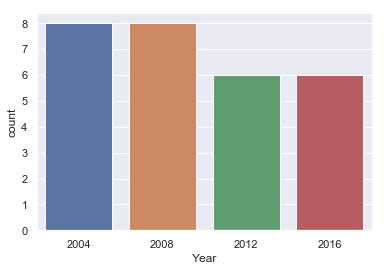

In [48]:
sns.countplot('Year', data=best_sportsman[['Medal', 'Year']].dropna());

Michael Fred Phelps II is swimmer from USA, his first start was in 2000, he was 15 years old and unfortunately in this year he didn't win any medals. But from 2004 to 2016 he has been winning 6-8 medals in each Olympiads in different swimming styles. 

## Sports

Now let's get some information about some kinds of sports.

In [49]:
df['Sport'].nunique()

66

In [50]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Boxing', 'Wrestling', 'Swimming',
       'Speed Skating', 'Short Track Speed Skating', 'Softball', 'Hockey',
       'Curling', 'Archery', 'Triathlon', 'Football',
       'Rhythmic Gymnastics', 'Athletics', 'Badminton', 'Fencing',
       'Figure Skating', 'Gymnastics', 'Volleyball', 'Baseball',
       'Water Polo', 'Snowboarding', 'Shooting', 'Weightlifting',
       'Cycling', 'Rowing', 'Sailing', 'Diving', 'Modern Pentathlon',
       'Art Competitions', 'Synchronized Swimming', 'Handball',
       'Canoeing', 'Cross Country Skiing', 'Table Tennis', 'Ice Hockey',
       'Tennis', 'Taekwondo', 'Freestyle Skiing', 'Beach Volleyball',
       'Trampolining', 'Alpine Skiing', 'Golf', 'Biathlon',
       'Equestrianism', 'Ski Jumping', 'Tug-Of-War', 'Bobsleigh',
       'Nordic Combined', 'Polo', 'Skeleton', 'Rugby Sevens', 'Luge',
       'Roque', 'Rugby', 'Lacrosse', 'Jeu De Paume',
       'Military Ski Patrol', 'Cricket', 'Croquet', 'Motorboating',
       'Basque 

In [51]:
df['Event'].nunique()

765

In [52]:
def number_of_year(group):
    "Add how many times sport included in olympic games"
    group['Times'] = len(group.groupby(['Year']))
    return group

In [53]:
sports = df.groupby(['Sport']).apply(number_of_year)
sports = sports.groupby(['Sport', 'Year'])['Times'].mean()

In [54]:
sports.name = 'Times'
sports = sports.reset_index()
sports.sort_values(by='Times', inplace=True)

In [55]:
sports['Sport'].value_counts()

Swimming                     29
Cycling                      29
Fencing                      29
Athletics                    29
Gymnastics                   29
Rowing                       28
Wrestling                    28
Diving                       27
Water Polo                   27
Football                     27
Shooting                     27
Weightlifting                26
Sailing                      26
Equestrianism                25
Boxing                       25
Figure Skating               24
Modern Pentathlon            24
Ice Hockey                   23
Hockey                       23
Cross Country Skiing         22
Nordic Combined              22
Ski Jumping                  22
Speed Skating                22
Bobsleigh                    21
Canoeing                     19
Basketball                   19
Alpine Skiing                19
Tennis                       16
Archery                      16
Biathlon                     15
                             ..
Table Te

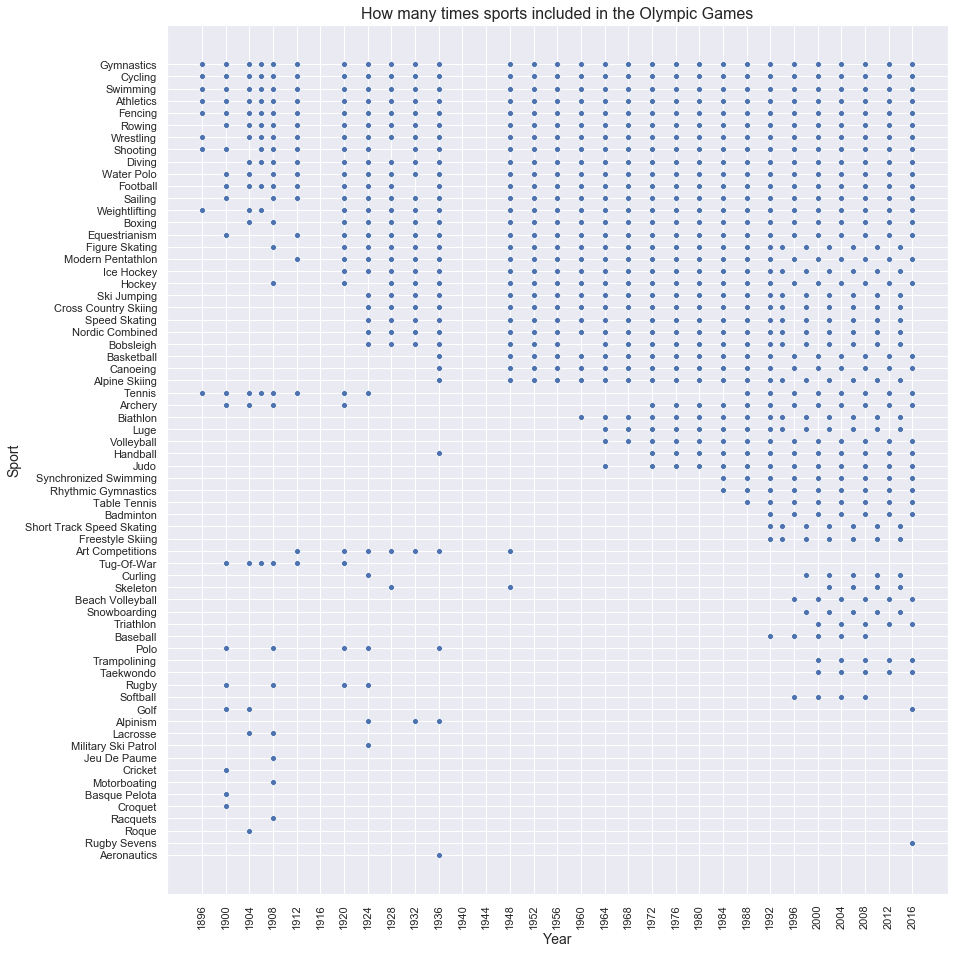

In [56]:
plt.figure(figsize=(14, 16))

plt.title('How many times sports included in the Olympic Games', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Sport', size=14)

plt.xticks(range(1896, 2020, 4), rotation=90)

sns.scatterplot(x='Year', y='Sport', data=sports);

Now we can notice some sports were included in Games only once or twice. Also, we can see that some sports had a "break", like Golf, Tennis or Curling. And we can see some new sports, that were added in last time. And, of course we can see "leaders" - sports were in all The Olympic Games history.

Let's see a little bit closer on the oldest member - 'Gymnastics'. 

In [57]:
golds_in_gymnastics = df[(df['Sport'] == 'Gymnastics') & (df['Medal'] == 'Gold')]

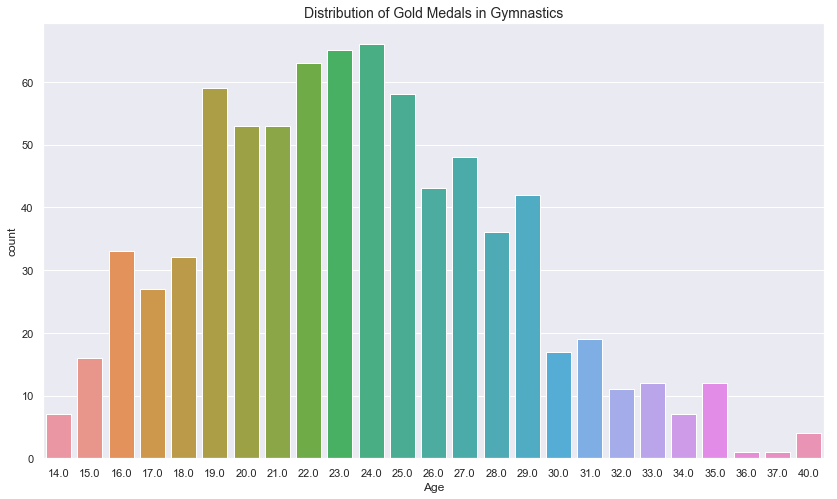

In [58]:
plt.figure(figsize=(14, 8))
sns.countplot(x = 'Age', data=golds_in_gymnastics)
plt.title('Distribution of Gold Medals in Gymnastics', size=14);

Most of medals were winning by people in age range from 19 to 29. Let's see who got the most medals in this sport.

In [59]:
top_gymnastic_athlets = golds_in_gymnastics['Name'].value_counts()

In [60]:
top_gymnastic_athlets.head()

Larysa Semenivna Latynina (Diriy-)    9
Sawao Kato                            8
Borys Anfiyanovych Shakhlin           7
Nikolay Yefimovich Andrianov          7
Viktor Ivanovych Chukarin             7
Name: Name, dtype: int64

In [61]:
top15_medalist.loc[top_gymnastic_athlets.index[:3], :]

,Sport,Gold,Silver,Bronze,Total
Larysa Semenivna Latynina (Diriy-),Gymnastics,9.0,5.0,4.0,18.0
Sawao Kato,Gymnastics,8.0,3.0,1.0,12.0
Borys Anfiyanovych Shakhlin,Gymnastics,7.0,4.0,2.0,13.0


So, out top 3 athletes in gymnastics are in top 15 the most successful athletes ranking as well. They won not only gold medals, but a few silver and bronze, too. <br>

How about opposition? Sport which included only in 2016 - 'Rugby sevens'.

In [62]:
rugby_sevens = df[df['Sport'] == 'Rugby Sevens']
rugby_sevens.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
15163,7030,Perry Baker,M,30.0,185.0,82.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Men's Rugby Sevens,NaN,USA,NaN
15251,7705,"Akalaini ""Bui"" Baravilala",F,25.0,168.0,75.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,NaN,USA,NaN
15319,8093,Danny Barrett,M,26.0,188.0,102.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Men's Rugby Sevens,NaN,USA,NaN
15643,9988,Garrett Bender,M,24.0,193.0,105.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Men's Rugby Sevens,NaN,USA,NaN
16983,18354,Ryan Carlyle,F,26.0,168.0,66.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,NaN,USA,NaN


In [63]:
rugby_sevens.groupby(['Event', 'region']).size()

Event                              region      
Rugby Sevens Men's Rugby Sevens    Argentina       13
                                   Australia       13
                                   Brazil          12
                                   Fiji            13
                                   France          12
                                   Japan           12
                                   Kenya           12
                                   New Zealand     13
                                   South Africa    13
                                   Spain           13
                                   UK              12
                                   USA             13
Rugby Sevens Women's Rugby Sevens  Australia       12
                                   Brazil          13
                                   Canada          12
                                   Colombia        12
                                   Fiji            13
                                  

In [64]:
len(rugby_sevens.groupby(['Event', 'region'])) 

24

In [65]:
rugby_sevens.groupby(['Event', 'Medal', 'region']).size()

Event                              Medal   region      
Rugby Sevens Men's Rugby Sevens    Bronze  South Africa    13
                                   Gold    Fiji            13
                                   Silver  UK              12
Rugby Sevens Women's Rugby Sevens  Bronze  Canada          12
                                   Gold    Australia       12
                                   Silver  New Zealand     12
dtype: int64

So, rugby sevens it's a team sport, 12 teams for men's and women's event. The men's gold won team from Fiji, let's see on physique of this guys.

In [66]:
rugby_men_gold = rugby_sevens[(rugby_sevens['Sex'] == 'M') & (rugby_sevens['Medal'] == 'Gold')]

In [67]:
rugby_men_gold[['Weight']].describe()

,Weight
count,13.000000
mean,96.461538
std,10.063261
min,81.000000
25%,88.000000
50%,98.000000
75%,105.000000
max,109.000000


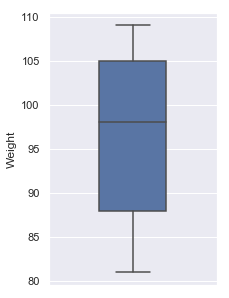

In [68]:
plt.figure(figsize=(3, 5))
sns.boxplot(rugby_men_gold['Weight'], orient='v', width=0.4);

In [69]:
rugby_men_gold[['Height']].describe()

,Height
count,13.000000
mean,186.384615
std,8.986457
min,171.000000
25%,180.000000
50%,189.000000
75%,192.000000
max,198.000000


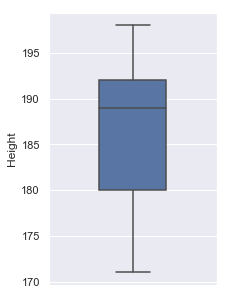

In [70]:
plt.figure(figsize=(3, 5))
sns.boxplot(rugby_men_gold['Height'], orient='v', width=0.4);

It's seems like these guys are really big. Median of their height is 189 cm and median of their weight is 98 kg.  